## 1. given the sentence, try your best to tokenize this sentence.

In [1]:
sentences = [
  'Hi Michael Stone, We are glad you could join us. I hope you have watched every video from week 1 and are prepared to put what you have learned into practise.',
]
sentences

['Hi Michael Stone, We are glad you could join us. I hope you have watched every video from week 1 and are prepared to put what you have learned into practise.']

In [2]:
import spacy

In [3]:
nlp = spacy.load("en_core_web_sm")

In [4]:
xu = nlp(  sentences[0]  )
xu.ents

(Michael Stone, week 1)

In [5]:
for sentence in sentences:
  print("Xuan print sentence in sentences: ", sentence)
  sentence_nlp = nlp(sentence)
  for token in sentence_nlp:
    print(token, token.tag_, token.pos_, token.lemma_)

Xuan print sentence in sentences:  Hi Michael Stone, We are glad you could join us. I hope you have watched every video from week 1 and are prepared to put what you have learned into practise.
Hi UH INTJ hi
Michael NNP PROPN Michael
Stone NNP PROPN Stone
, , PUNCT ,
We PRP PRON we
are VBP AUX be
glad JJ ADJ glad
you PRP PRON you
could MD AUX could
join VB VERB join
us PRP PRON we
. . PUNCT .
I PRP PRON I
hope VBP VERB hope
you PRP PRON you
have VBP AUX have
watched VBN VERB watch
every DT DET every
video NN NOUN video
from IN ADP from
week NN NOUN week
1 CD NUM 1
and CC CCONJ and
are VBP AUX be
prepared JJ ADJ prepared
to TO PART to
put VB VERB put
what WP PRON what
you PRP PRON you
have VBP AUX have
learned VBN VERB learn
into IN ADP into
practise NN NOUN practise
. . PUNCT .


**Rule based matching to extract relevant information from text.**

Identify and extract tokens and phrases according to patterns. We can use regular expressions to extract entities.

In [6]:
for sentence in sentences:
  sentence_nlp = nlp(sentence)
  for token in sentence_nlp:
    print(token, token.tag_, token.pos_, token.ent_type_) if token.pos_ == "PROPN" else "NONE"

Michael NNP PROPN PERSON
Stone NNP PROPN PERSON


In [7]:
sentence_nlp

Hi Michael Stone, We are glad you could join us. I hope you have watched every video from week 1 and are prepared to put what you have learned into practise.

In [8]:
from spacy.matcher import Matcher
pattern = [{"TAG" : "PRP"}]
matcher = Matcher(nlp.vocab)
matcher.add("PROPER_NOUNS", [pattern])
matches = matcher(sentence_nlp)
matches

[(3232560085755078826, 4, 5),
 (3232560085755078826, 7, 8),
 (3232560085755078826, 10, 11),
 (3232560085755078826, 12, 13),
 (3232560085755078826, 14, 15),
 (3232560085755078826, 28, 29)]

In [9]:
for match in matches:
  print(match)
  print(match[1], match[2])
  print(sentence_nlp[match[1]:match[2]])

(3232560085755078826, 4, 5)
4 5
We
(3232560085755078826, 7, 8)
7 8
you
(3232560085755078826, 10, 11)
10 11
us
(3232560085755078826, 12, 13)
12 13
I
(3232560085755078826, 14, 15)
14 15
you
(3232560085755078826, 28, 29)
28 29
you


In [10]:
## i want to get all word which are POS is verb:
from spacy.matcher import Matcher
pattern  = [{"POS" : "VERB"}]
matcher = Matcher(nlp.vocab)
matcher.add("Xuan_verb", [pattern])
matches = matcher(sentence_nlp)
matches

[(12677970557749086960, 9, 10),
 (12677970557749086960, 13, 14),
 (12677970557749086960, 16, 17),
 (12677970557749086960, 26, 27),
 (12677970557749086960, 30, 31)]

In [14]:
from spacy.matcher import Matcher
matcher = Matcher(nlp.vocab)
pattern = [{"TAG" : "NNP"}]
matcher.add("human_pattern", [pattern])
matches = matcher(sentence_nlp)
matches

[(17114318143722689381, 1, 2), (17114318143722689381, 2, 3)]

In [15]:
sentence_nlp[matches[0][1]]

Michael

### **<font color='blue'>Handling HTML Text**

Python's Beautiful Soup package can extract data from HTML and XML files. It works with your preferred parser to offer idiomatic ways of navigating, searching, and modifying the parse tree. It helps programmers to save hours or even days of effort.

https://beautiful-soup-4.readthedocs.io/en/latest/

In [16]:
url = "https://www.fao.org/newsroom/detail/world-food-prices-dip-in-december/en"
from bs4 import BeautifulSoup
import requests

In [17]:
xu = requests.get(url)
xu.content

b' <!DOCTYPE html> <html lang="en" > <head> <meta charset="utf-8" /> <meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no"> <title>\r\n\tWorld food prices dip in December\r\n</title> <script src="/ScriptResource.axd?d=6DQe8ARl7A9TiuWej5ttCsl0UxczkFZDbeL5SW9kKwZezKThjMd6CKk80af9FalSKa-iav7TTDncR2lY8pDjm3GfAJE4PtQDLQKTHvlXubFpiBl5L2i8chWLcfOXJghIDWVmV7HDcMgBha1sHF1HkvsG2gh96v6WMgcTICorlXSyCWKJN2ZyaRZDDb4Aqzqr0&amp;t=ffffffff927db8ce" type="text/javascript"></script><script src="/ScriptResource.axd?d=dJqyoTStQGFGCcNtOAFUctOJCyRSc4yqRSI73XwbovU6PqQZNxY5Jab6ztzk0jR2v15jaQwx5m7sZ2LBg2R5cNaMfc1Ynq6w7hu7U6LHIIUYD9BMNEqbMN8G3rrnYR21-ohEwKgwd6kg6S14vSY1Azk4DOa5MZRU7k3Nb6LhruAi6AUkTnPHZfP7Z5vwie_Q0&amp;t=ffffffff927db8ce" type="text/javascript"></script><script src="https://cse.google.com/cse.js?cx=018170620143701104933%3Aqq82jsfba7w" type="text/javascript"></script><link href="/ResourcePackages/Bootstrap5/assets/dist/css/main.min.css?v=5.3.3&amp;package=FAO" rel="

In [18]:
BeautifulSoup(xu.content)

<!DOCTYPE html>
<html lang="en"> <head> <meta charset="utf-8"/> <meta content="width=device-width, initial-scale=1, shrink-to-fit=no" name="viewport"/> <title>
	World food prices dip in December
</title> <script src="/ScriptResource.axd?d=6DQe8ARl7A9TiuWej5ttCsl0UxczkFZDbeL5SW9kKwZezKThjMd6CKk80af9FalSKa-iav7TTDncR2lY8pDjm3GfAJE4PtQDLQKTHvlXubFpiBl5L2i8chWLcfOXJghIDWVmV7HDcMgBha1sHF1HkvsG2gh96v6WMgcTICorlXSyCWKJN2ZyaRZDDb4Aqzqr0&amp;t=ffffffff927db8ce" type="text/javascript"></script><script src="/ScriptResource.axd?d=dJqyoTStQGFGCcNtOAFUctOJCyRSc4yqRSI73XwbovU6PqQZNxY5Jab6ztzk0jR2v15jaQwx5m7sZ2LBg2R5cNaMfc1Ynq6w7hu7U6LHIIUYD9BMNEqbMN8G3rrnYR21-ohEwKgwd6kg6S14vSY1Azk4DOa5MZRU7k3Nb6LhruAi6AUkTnPHZfP7Z5vwie_Q0&amp;t=ffffffff927db8ce" type="text/javascript"></script><script src="https://cse.google.com/cse.js?cx=018170620143701104933%3Aqq82jsfba7w" type="text/javascript"></script><link href="/ResourcePackages/Bootstrap5/assets/dist/css/main.min.css?v=5.3.3&amp;package=FAO" rel="stylesheet"

In [19]:
soup = BeautifulSoup(xu.content, "html.parser")
data = soup.find(id = "Contentplaceholder1_C011_Col00")
data

<div class="sf_colsIn container" data-placeholder-label="Container" data-sf-element="Container" id="Contentplaceholder1_C011_Col00"><div class="row" data-sf-element="Row">
<div class="sf_colsIn col-md-12 content-icons d-flex justify-content-end mt-3 text-decoration-none" data-placeholder-label="Column 1" data-sf-element="Column 1" id="Contentplaceholder1_C014_Col00">
</div>
</div>
<div class="row" data-sf-element="Row">
<div class="sf_colsIn col-md-12" data-placeholder-label="Column 1" data-sf-element="Column 1" id="Contentplaceholder1_C015_Col00">
<script type="application/ld+json">
    {
    "@context" : "http://schema.org",
    "@type" : "Article",
    "name" : "World food prices dip in December",
    "publisher": {
        "@type": "Organization",
        "name": "FAO",
        "logo": {
        "@type": "ImageObject",
        "url": "https://www.fao.org/ResourcePackages/FAO/assets/dist/img/FAO-logo.JPG"
        }
    },
    "datePublished" : "06/01/2023"
    }
</script>
<div>
<div

In [20]:
for i in data:
  print("xu", i.text if len(i.text) !=0 else "NONE")

xu 



xu 

xu 





World food prices dip in December
FAO Food Price Index ends 2022 lower than a year earlier




                                A farmer in Sicily carrying wheat seeds.
                             

©FAO/Giorgio Cosulich 




06/01/2023


Rome – The index of world food prices dipped for the ninth consecutive month in December 2022, declining by 1.9 percent from the previous month, the Food and Agriculture Organization of the United Nations (FAO) reported today. The FAO Food Price Index averaged 132.4 points in December, 1.0 percent below its value a year earlier. However, for 2022 as a whole, the index, which tracks monthly changes in the international prices of commonly-traded food commodities, averaged 143.7 points, 14.3 percent higher than the average value over 2021. “Calmer food commodity prices are welcome after two very volatile years,” said FAO Chief Economist Maximo Torero. “It is important to remain vigilant and keep a strong focus on mitigating global fo

In [21]:
data.get_text()

"\n\n\n\n\n\n\n\n\n\nWorld food prices dip in December\nFAO Food Price Index ends 2022 lower than a year earlier\n\n\n\n\r\n                                A farmer in Sicily carrying wheat seeds.\r\n                             \n\n©FAO/Giorgio Cosulich \n\n\n\n\n06/01/2023\n\n\nRome – The index of world food prices dipped for the ninth consecutive month in December 2022, declining by 1.9 percent from the previous month, the Food and Agriculture Organization of the United Nations (FAO) reported today. The FAO Food Price Index averaged 132.4 points in December, 1.0 percent below its value a year earlier. However, for 2022 as a whole, the index, which tracks monthly changes in the international prices of commonly-traded food commodities, averaged 143.7 points, 14.3 percent higher than the average value over 2021. “Calmer food commodity prices are welcome after two very volatile years,” said FAO Chief Economist Maximo Torero. “It is important to remain vigilant and keep a strong focus on

In [22]:
data.text

"\n\n\n\n\n\n\n\n\n\nWorld food prices dip in December\nFAO Food Price Index ends 2022 lower than a year earlier\n\n\n\n\r\n                                A farmer in Sicily carrying wheat seeds.\r\n                             \n\n©FAO/Giorgio Cosulich \n\n\n\n\n06/01/2023\n\n\nRome – The index of world food prices dipped for the ninth consecutive month in December 2022, declining by 1.9 percent from the previous month, the Food and Agriculture Organization of the United Nations (FAO) reported today. The FAO Food Price Index averaged 132.4 points in December, 1.0 percent below its value a year earlier. However, for 2022 as a whole, the index, which tracks monthly changes in the international prices of commonly-traded food commodities, averaged 143.7 points, 14.3 percent higher than the average value over 2021. “Calmer food commodity prices are welcome after two very volatile years,” said FAO Chief Economist Maximo Torero. “It is important to remain vigilant and keep a strong focus on

In [23]:
print(data.get_text(strip = True, separator = ". "))

World food prices dip in December. FAO Food Price Index ends 2022 lower than a year earlier. A farmer in Sicily carrying wheat seeds.. ©FAO/Giorgio Cosulich. 06/01/2023. Rome –. The index of world food prices dipped for the ninth consecutive month in December 2022, declining by 1.9 percent from the previous month, the Food and Agriculture Organization of the United Nations (FAO) reported today.. The. FAO Food Price Index. averaged 132.4 points in December, 1.0 percent below its value a year earlier. However, for 2022 as a whole, the index, which tracks monthly changes in the international prices of commonly-traded food commodities, averaged 143.7 points, 14.3 percent higher than the average value over 2021.. “Calmer food commodity prices are welcome after two very volatile years,” said FAO Chief Economist Maximo Torero. “It is important to remain vigilant and keep a strong focus on mitigating global food insecurity given that world food prices remain at elevated levels, with many stapl

In [62]:
text = data.get_text(strip = True, separator = ". ")
import re
text

"World food prices dip in December. FAO Food Price Index ends 2022 lower than a year earlier. A farmer in Sicily carrying wheat seeds.. ©FAO/Giorgio Cosulich. 06/01/2023. Rome –. The index of world food prices dipped for the ninth consecutive month in December 2022, declining by 1.9 percent from the previous month, the Food and Agriculture Organization of the United Nations (FAO) reported today.. The. FAO Food Price Index. averaged 132.4 points in December, 1.0 percent below its value a year earlier. However, for 2022 as a whole, the index, which tracks monthly changes in the international prices of commonly-traded food commodities, averaged 143.7 points, 14.3 percent higher than the average value over 2021.. “Calmer food commodity prices are welcome after two very volatile years,” said FAO Chief Economist Maximo Torero. “It is important to remain vigilant and keep a strong focus on mitigating global food insecurity given that world food prices remain at elevated levels, with many stap

In [63]:
text = re.sub(r'\.\.', '.', text)
text

"World food prices dip in December. FAO Food Price Index ends 2022 lower than a year earlier. A farmer in Sicily carrying wheat seeds. ©FAO/Giorgio Cosulich. 06/01/2023. Rome –. The index of world food prices dipped for the ninth consecutive month in December 2022, declining by 1.9 percent from the previous month, the Food and Agriculture Organization of the United Nations (FAO) reported today. The. FAO Food Price Index. averaged 132.4 points in December, 1.0 percent below its value a year earlier. However, for 2022 as a whole, the index, which tracks monthly changes in the international prices of commonly-traded food commodities, averaged 143.7 points, 14.3 percent higher than the average value over 2021. “Calmer food commodity prices are welcome after two very volatile years,” said FAO Chief Economist Maximo Torero. “It is important to remain vigilant and keep a strong focus on mitigating global food insecurity given that world food prices remain at elevated levels, with many staples

1. removing special characters:

In [64]:
def special_removal(text, digit = False):
  pattern = r'[^a-zA-z0-9\s]' if not digit else r'[^a-zA-z\s]'
  text = re.sub(pattern, " ", text)
  return text
text = special_removal(text)

In [37]:
text

'World food prices dip in December  FAO Food Price Index ends 2022 lower than a year earlier  A farmer in Sicily carrying wheat seeds   FAO Giorgio Cosulich  06 01 2023  Rome    The index of world food prices dipped for the ninth consecutive month in December 2022  declining by 1 9 percent from the previous month  the Food and Agriculture Organization of the United Nations  FAO  reported today  The  FAO Food Price Index  averaged 132 4 points in December  1 0 percent below its value a year earlier  However  for 2022 as a whole  the index  which tracks monthly changes in the international prices of commonly traded food commodities  averaged 143 7 points  14 3 percent higher than the average value over 2021   Calmer food commodity prices are welcome after two very volatile years   said FAO Chief Economist Maximo Torero   It is important to remain vigilant and keep a strong focus on mitigating global food insecurity given that world food prices remain at elevated levels  with many staples

2. Remove accented characters

In [65]:
import unicodedata

In [44]:
unicodedata.normalize('NFKD', 'Bạn đang làm gì thế').encode('ascii', 'ignore').decode('utf-8', 'ignore')

'Ban ang lam gi the'

In [66]:
def accented_removal(text):
  text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
  return text
text = accented_removal(text)

In [46]:
text

'World food prices dip in December  FAO Food Price Index ends 2022 lower than a year earlier  A farmer in Sicily carrying wheat seeds   FAO Giorgio Cosulich  06 01 2023  Rome    The index of world food prices dipped for the ninth consecutive month in December 2022  declining by 1 9 percent from the previous month  the Food and Agriculture Organization of the United Nations  FAO  reported today  The  FAO Food Price Index  averaged 132 4 points in December  1 0 percent below its value a year earlier  However  for 2022 as a whole  the index  which tracks monthly changes in the international prices of commonly traded food commodities  averaged 143 7 points  14 3 percent higher than the average value over 2021   Calmer food commodity prices are welcome after two very volatile years   said FAO Chief Economist Maximo Torero   It is important to remain vigilant and keep a strong focus on mitigating global food insecurity given that world food prices remain at elevated levels  with many staples

3. Text Lemmatization

In [48]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
lemmatizer.lemmatize("cats")

[nltk_data] Downloading package wordnet to /root/nltk_data...


'cat'

In [67]:
def lemetization(text):
  lementizer = WordNetLemmatizer()
  text = " ".join([lementizer.lemmatize(i) for i in text.split()])
  return text

text = lemetization(text)
text

'World food price dip in December FAO Food Price Index end 2022 lower than a year earlier A farmer in Sicily carrying wheat seed FAO Giorgio Cosulich 06 01 2023 Rome The index of world food price dipped for the ninth consecutive month in December 2022 declining by 1 9 percent from the previous month the Food and Agriculture Organization of the United Nations FAO reported today The FAO Food Price Index averaged 132 4 point in December 1 0 percent below it value a year earlier However for 2022 a a whole the index which track monthly change in the international price of commonly traded food commodity averaged 143 7 point 14 3 percent higher than the average value over 2021 Calmer food commodity price are welcome after two very volatile year said FAO Chief Economist Maximo Torero It is important to remain vigilant and keep a strong focus on mitigating global food insecurity given that world food price remain at elevated level with many staple near record high and with price of rice increas

4. Steming process.

In [57]:
steamer = nltk.porter.PorterStemmer()
steamer.stem("good")

'good'

In [68]:
def steaming_process(text):
  stemer = nltk.porter.PorterStemmer()
  return " ".join([stemer.stem(word) for word in text.split()])

text = steaming_process(text)

In [69]:
text

'world food price dip in decemb fao food price index end 2022 lower than a year earlier a farmer in sicili carri wheat seed fao giorgio cosulich 06 01 2023 rome the index of world food price dip for the ninth consecut month in decemb 2022 declin by 1 9 percent from the previou month the food and agricultur organ of the unit nation fao report today the fao food price index averag 132 4 point in decemb 1 0 percent below it valu a year earlier howev for 2022 a a whole the index which track monthli chang in the intern price of commonli trade food commod averag 143 7 point 14 3 percent higher than the averag valu over 2021 calmer food commod price are welcom after two veri volatil year said fao chief economist maximo torero it is import to remain vigil and keep a strong focu on mitig global food insecur given that world food price remain at elev level with mani stapl near record high and with price of rice increas and still mani risk associ with futur suppli veget oil world quotat led the d

5. Real practice

In [72]:
url = 'https://inshorts.com/en/read/technology'
root = "/".join(url.split('/')[:-1])
domain = [url.split('/')[-1], 'sports', 'world', 'business']
domain

['technology', 'sports', 'world', 'business']

In [80]:
url_list = [root + "/" + i for i in domain]
url_list

['https://inshorts.com/en/read/technology',
 'https://inshorts.com/en/read/sports',
 'https://inshorts.com/en/read/world',
 'https://inshorts.com/en/read/business']

In [121]:
from urllib import request
import requests
from bs4 import BeautifulSoup

def headline(url):
  data = requests.get(url)
  soup = BeautifulSoup(data.content, 'html.parser')
  headlines = [item.contents[0] for item in soup.find_all('span', attrs={'itemprop' : 'headline'})]
  body = [item.contents[0] for item in soup.find_all( attrs={'itemprop' : 'articleBody'})]
  return headlines, body
head_line, body = headline(url_list[0])


In [123]:
import pandas as pd
def to_datafram(headline, body, domain):
  df = pd.DataFrame({'headline' : headline, 'body' : body, 'domain' : domain})
  return df
df = to_datafram(head_line, body, domain[0])
df

,headline,body,domain
0,Meta to pay Trump ₹216 crore to settle 2021 ac...,Meta has agreed to pay US President Donald Tru...,technology
1,OpenAI CEO Sam Altman plans to visit India nex...,OpenAI CEO Sam Altman reportedly plans to visi...,technology
2,Microsoft probes if DeepSeek-linked group took...,Microsoft and OpenAI are probing whether a gro...,technology
3,"Google employees write to CEO Sundar Pichai, d...",Google employees are circulating an internal p...,technology
4,"Who is 'AI prodigy' Luo Fuli, involved in Deep...",Chinese 'AI prodigy' Luo Fuli played a crucial...,technology
5,Tried LSD 4-5 times in teenage but won't recom...,"Microsoft Co-founder Bill Gates, in his upcomi...",technology
6,US Navy bans DeepSeek AI over security and eth...,US Navy has warned its members against using t...,technology
7,OpenAI's Sam Altman shares selfie with Microso...,OpenAI CEO Sam Altman shared his selfie with M...,technology
8,DeepSeek AI challenges western dominance with ...,China's DeepSeek AI is shaking up the tech wor...,technology
9,Focus Edumatics lays off employees in Coimbato...,"US-based education firm, Focus Edumatics abrup...",technology


In [124]:
for url in url_list:
  head_line, body = headline(url)
  df_temp = to_datafram(head_line, body, url.split('/')[-1])
  df = pd.concat([df, df_temp])
df

,headline,body,domain
0,Meta to pay Trump ₹216 crore to settle 2021 ac...,Meta has agreed to pay US President Donald Tru...,technology
1,OpenAI CEO Sam Altman plans to visit India nex...,OpenAI CEO Sam Altman reportedly plans to visi...,technology
2,Microsoft probes if DeepSeek-linked group took...,Microsoft and OpenAI are probing whether a gro...,technology
3,"Google employees write to CEO Sundar Pichai, d...",Google employees are circulating an internal p...,technology
4,"Who is 'AI prodigy' Luo Fuli, involved in Deep...",Chinese 'AI prodigy' Luo Fuli played a crucial...,technology
5,Tried LSD 4-5 times in teenage but won't recom...,"Microsoft Co-founder Bill Gates, in his upcomi...",technology
6,US Navy bans DeepSeek AI over security and eth...,US Navy has warned its members against using t...,technology
7,OpenAI's Sam Altman shares selfie with Microso...,OpenAI CEO Sam Altman shared his selfie with M...,technology
8,DeepSeek AI challenges western dominance with ...,China's DeepSeek AI is shaking up the tech wor...,technology
9,Focus Edumatics lays off employees in Coimbato...,"US-based education firm, Focus Edumatics abrup...",technology


6. Word Cloud

In [125]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud

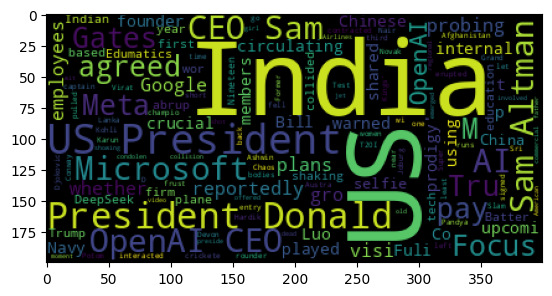

In [130]:
df['body']
plt.imshow(WordCloud().generate(str(df['body'])))
plt.show()

In [132]:
import re
import unicodedata
from nltk.stem import WordNetLemmatizer
def remove_html(text):
  soup = BeautifulSoup(text, 'html.parser')
  text = soup.get_text()
  return text
def remove_accented_chars(text):
  text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
  return text
def remove_special_chars(text, remove_digits = False):
  pattern = r'[^a-zA-Z0-9\s]' if not remove_digits else r'[^a-zA-Z\s]'
  text = re.sub(pattern, '', text)
  return text
def lementization(text):
  lementize = WordNetLemmatizer()
  text = " ".join([lementize.lemmatize(word) for word  in text.split()])
  return text
def steming(text):
  stemer = nltk.porter.PorterStemmer()
  text = " ".join([stemer.stem(word) for word in text.split()])
  return text

df["full_text"] = df["body"].apply(lambda x: steming(lementization(remove_special_chars(remove_accented_chars(remove_html(x))))))

In [137]:
df["full_text"] = df["body"].map(str) + '.' + df['headline'].map(str)
df['claned_text'] = df["full_text"].apply(lambda x: steming(lementization(remove_special_chars(remove_accented_chars(remove_html(x))))))
df

,headline,body,domain,full_text,claned_text
0,Meta to pay Trump ₹216 crore to settle 2021 ac...,Meta has agreed to pay US President Donald Tru...,technology,Meta has agreed to pay US President Donald Tru...,meta ha agre to pay us presid donald trump 25 ...
1,OpenAI CEO Sam Altman plans to visit India nex...,OpenAI CEO Sam Altman reportedly plans to visi...,technology,OpenAI CEO Sam Altman reportedly plans to visi...,openai ceo sam altman reportedli plan to visit...
2,Microsoft probes if DeepSeek-linked group took...,Microsoft and OpenAI are probing whether a gro...,technology,Microsoft and OpenAI are probing whether a gro...,microsoft and openai are probe whether a group...
3,"Google employees write to CEO Sundar Pichai, d...",Google employees are circulating an internal p...,technology,Google employees are circulating an internal p...,googl employe are circul an intern petit titl ...
4,"Who is 'AI prodigy' Luo Fuli, involved in Deep...",Chinese 'AI prodigy' Luo Fuli played a crucial...,technology,Chinese 'AI prodigy' Luo Fuli played a crucial...,chines ai prodigi luo fuli play a crucial role...
5,Tried LSD 4-5 times in teenage but won't recom...,"Microsoft Co-founder Bill Gates, in his upcomi...",technology,"Microsoft Co-founder Bill Gates, in his upcomi...",microsoft cofound bill gate in hi upcom memoir...
6,US Navy bans DeepSeek AI over security and eth...,US Navy has warned its members against using t...,technology,US Navy has warned its members against using t...,us navi ha warn it member against use the ai m...
7,OpenAI's Sam Altman shares selfie with Microso...,OpenAI CEO Sam Altman shared his selfie with M...,technology,OpenAI CEO Sam Altman shared his selfie with M...,openai ceo sam altman share hi selfi with micr...
8,DeepSeek AI challenges western dominance with ...,China's DeepSeek AI is shaking up the tech wor...,technology,China's DeepSeek AI is shaking up the tech wor...,china deepseek ai is shake up the tech world r...
9,Focus Edumatics lays off employees in Coimbato...,"US-based education firm, Focus Edumatics abrup...",technology,"US-based education firm, Focus Edumatics abrup...",usbas educ firm focu edumat abruptli shut down...
